In [296]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn
from scipy.ndimage import laplace

import matplotlib.tri as tri

import os
import seaborn as sns
import importlib

In [188]:
import display_results

In [189]:
def set_sns():
    sns.set_theme()
    sns.set_style("darkgrid")
    sns.set(
        rc={
            "axes.axisbelow": True,
            "axes.edgecolor": "black",
            "axes.facecolor": "white",
            "axes.grid": False,
            "axes.labelcolor": "black",
            "axes.spines.right": False,
            "axes.spines.top": False,
            "figure.facecolor": "white",
            "lines.solid_capstyle": "round",
            "patch.edgecolor": "w",
            "patch.force_edgecolor": True,
            "text.color": "black",
            "xtick.bottom": False,
            "xtick.color": "black",
            "xtick.direction": "out",
            "xtick.top": False,
            "ytick.color": "black",
            "ytick.direction": "out",
            "ytick.left": False,
            "ytick.right": False,
            "legend.facecolor": "white",
            "grid.color": "black",
            "grid.linestyle": "--"
        },
    )

# Plots models

In [190]:
# Plot boundary

# i_list = ['0', '1', '2', '3', '4']
# type_list = ['linear', 'linear_gls', 'bubble', 'p1-iso-p2']
# delta_list = [None, 0.01, 0.1, 0.5, 1, 10]
# c_list = [1, 10, 100]

In [191]:
i = '4'
type = 'linear'
delta = 'None'
c = 100

# Read data
coord = np.array(pd.read_csv(f'./Models/coord_i{i}_type{type}_c{c}_delta{delta}.csv', index_col = 0))
triang_velocity = np.array(pd.read_csv(f'./Models/triangv_i{i}_type{type}_c{c}_delta{delta}.csv', index_col = 0))
triang_pressure = np.array(pd.read_csv(f'./Models/triangp_i{i}_type{type}_c{c}_delta{delta}.csv', index_col = 0))
uh = np.array(pd.read_csv(f'./Models/v_i{i}_type{type}_c{c}_delta{delta}.csv', index_col = 0))
p =  np.array(pd.read_csv(f'./Models/p_i{i}_type{type}_c{c}_delta{delta}.csv', index_col = 0))
u_1_true = np.array(pd.read_csv(f'./Models/v1sol_i{i}_type{type}_c{c}_delta{delta}.csv', index_col = 0))
u_2_true = np.array(pd.read_csv(f'./Models/v2sol_i{i}_type{type}_c{c}_delta{delta}.csv', index_col = 0))
p_true = np.array(pd.read_csv(f'./Models/psol_i{i}_type{type}_c{c}_delta{delta}.csv', index_col = 0))

## Plot geometry and boundary

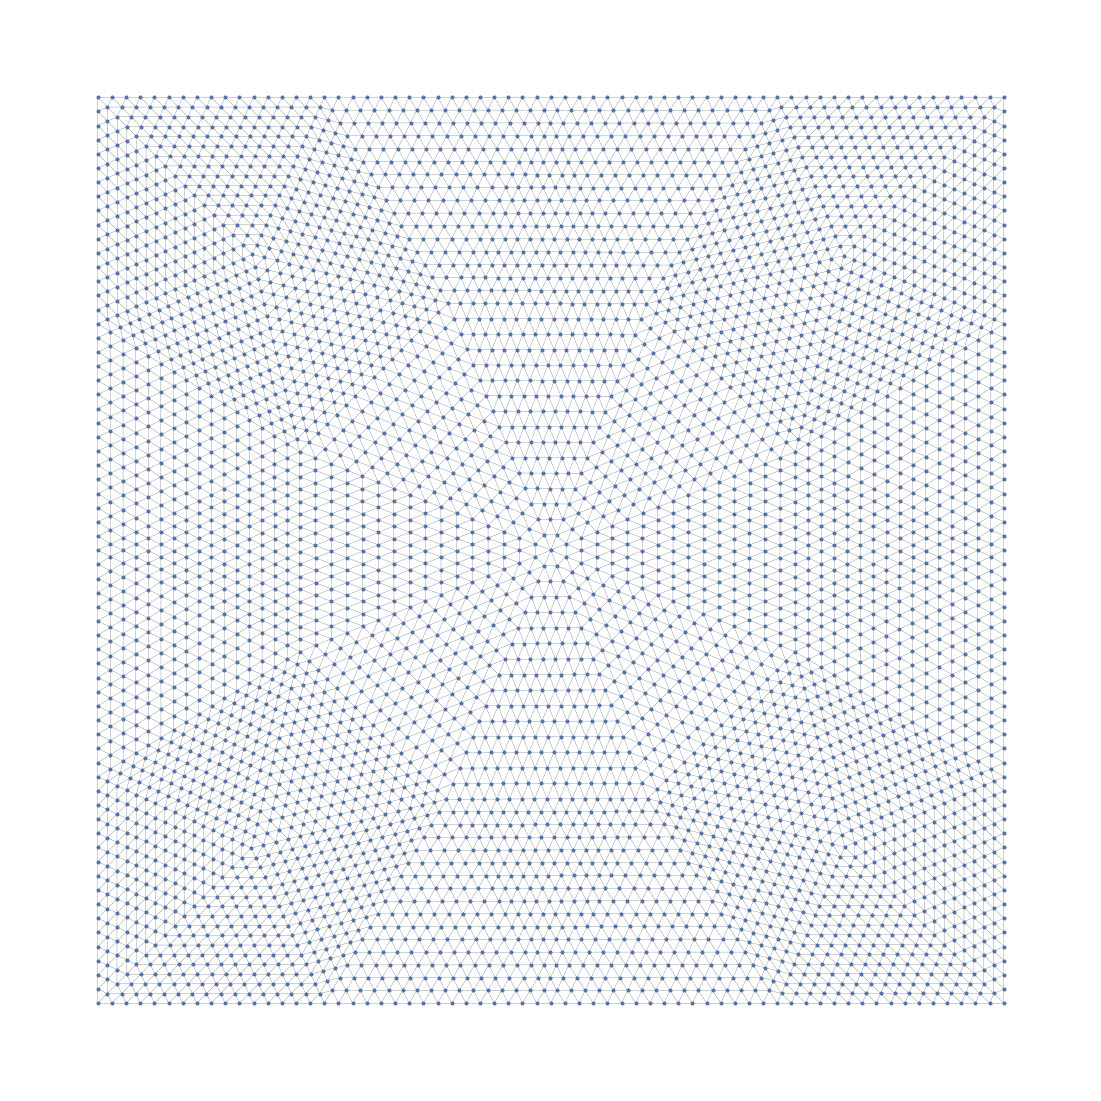

In [192]:
set_sns()
display_results.plot_geometry(coord, 
                              triang_velocity, figsize = [20, 20], save_name = f"fig_geo_{i}{type}{delta}{c}")

# Plot results 2D

In [193]:
lines_A = np.max(np.array(triang_velocity.astype(int)))
lines_B = np.max(np.array(triang_pressure.astype(int)))

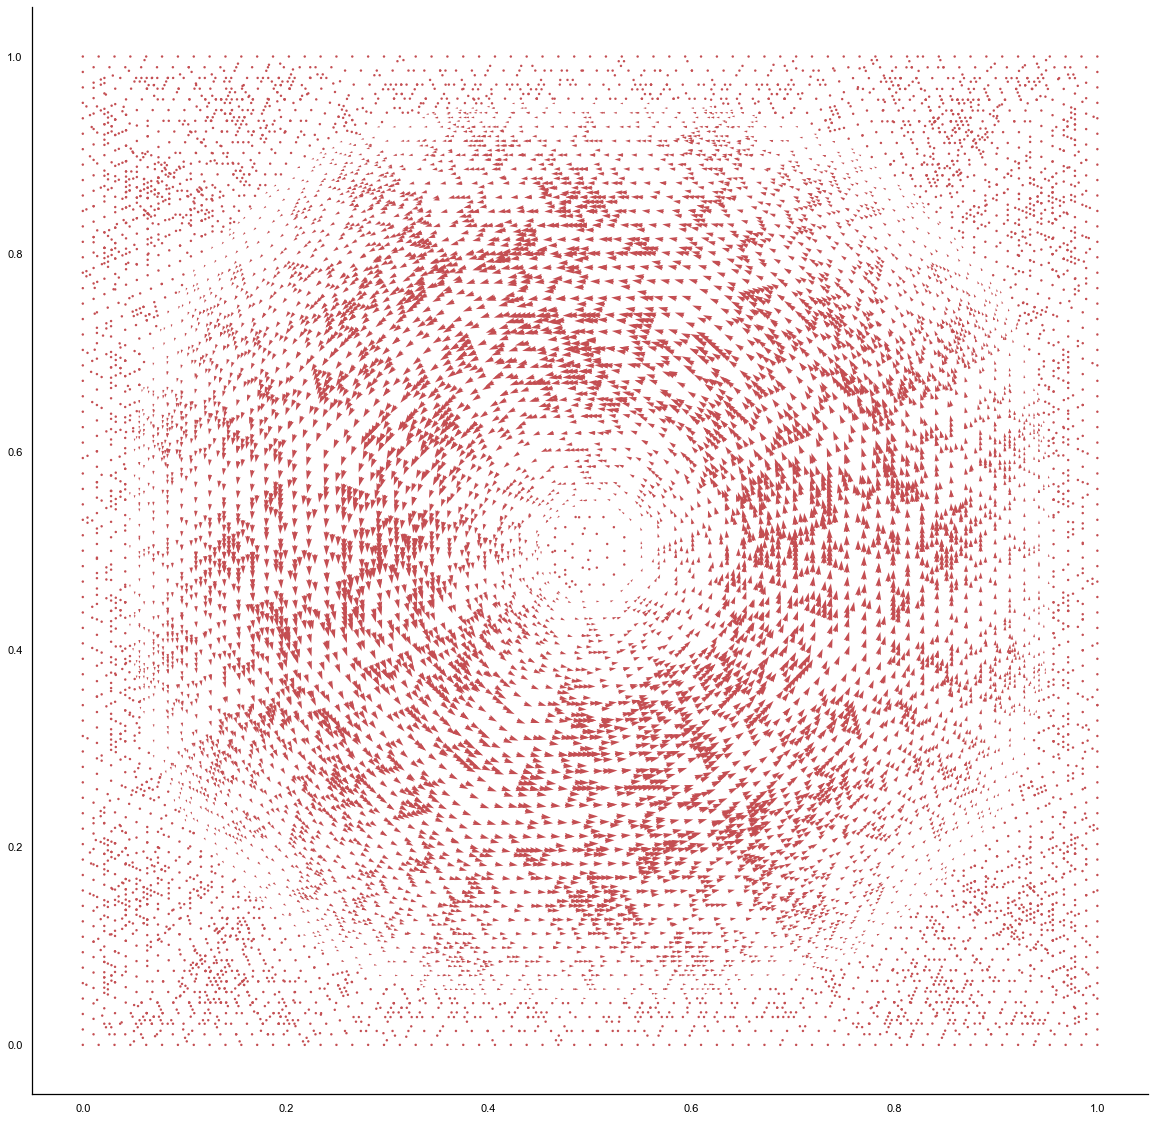

In [305]:
# Create a new figure
plt.figure(figsize = (20,20))

# Create a quiver plot
Q = plt.quiver(coord[:, 0], coord[:, 1], u_1_true, u_2_true, color='r')

# Display the plot
plt.show()

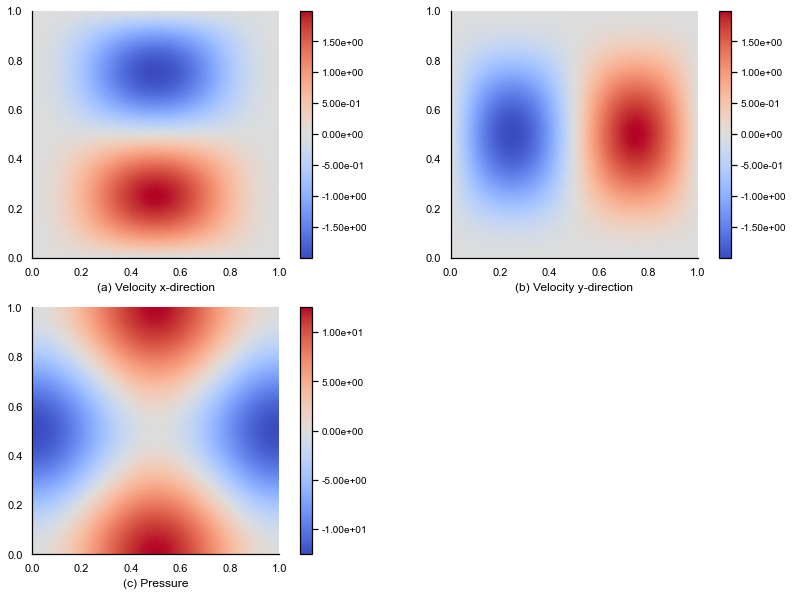

In [307]:
# True solution
set_sns()
save_name = f"true_sol_{i}{type}{delta}{c}"
fig, ax = plt.subplots(2,2, figsize = [15, 10])
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              u_1_true[:lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,0],
                              cmap = 'coolwarm')
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              u_2_true[:lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,1],
                              cmap = 'coolwarm')

display_results.plot_field_2D(coord[:lines_B,:], 
                              triang_pressure[:, :3], 
                              p_true[:lines_B].flatten(), 
                              nodal = False, 
                              ax = ax[1,0],
                              cmap = 'coolwarm')

plt.subplots_adjust(wspace= 0, hspace=0.2) 

ax[1][1].set_visible(False)
ax[0][0].text(0.5, -0.12, "(a) Velocity x-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][0].transAxes)
ax[0][1].text(0.5, -0.12, "(b) Velocity y-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][1].transAxes)
ax[1][0].text(0.5, -0.12, "(c) Pressure", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[1][0].transAxes)

if save_name is not None:
    display_results.save_fig(f'{save_name}')

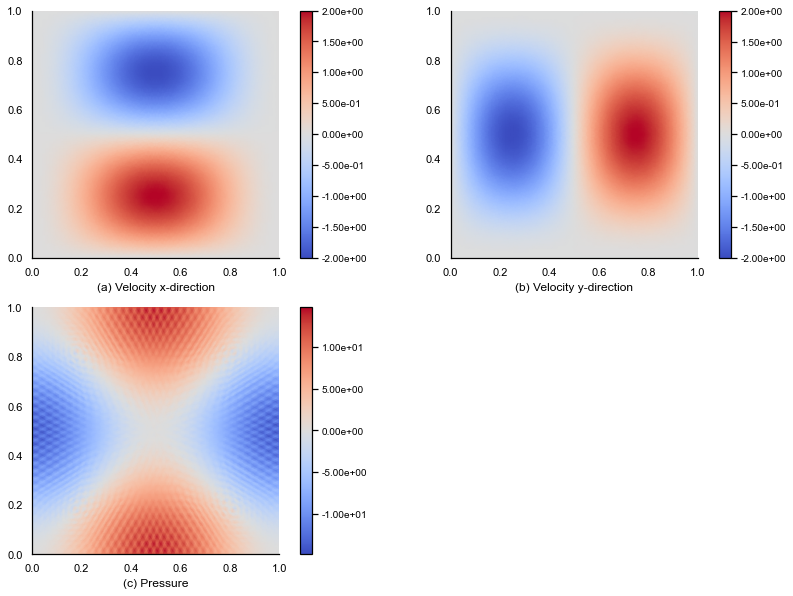

In [195]:
# True solution
set_sns()
save_name = f"sol_{i}{type}{delta}{c}"
fig, ax = plt.subplots(2,2, figsize = [15, 10])
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              uh[:lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,0],
                              cmap = 'coolwarm')
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              uh[lines_A:2*lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,1],
                              cmap = 'coolwarm')

display_results.plot_field_2D(coord[:lines_B,:], 
                              triang_pressure[:, :3], 
                              p[:lines_B].flatten(), 
                              nodal = False, 
                              ax = ax[1,0],
                              cmap = 'coolwarm')

plt.subplots_adjust(wspace= 0, hspace=0.2) 

ax[1][1].set_visible(False)
ax[0][0].text(0.5, -0.12, "(a) Velocity x-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][0].transAxes)
ax[0][1].text(0.5, -0.12, "(b) Velocity y-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][1].transAxes)
ax[1][0].text(0.5, -0.12, "(c) Pressure", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[1][0].transAxes)

if save_name is not None:
    display_results.save_fig(f'{save_name}')

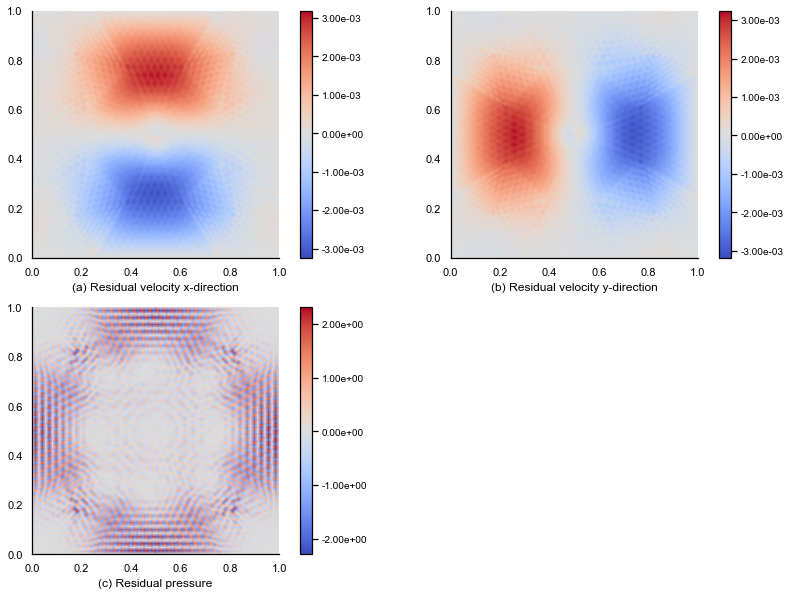

In [196]:
# Residual
set_sns()
save_name = f"sol_{i}{type}{delta}{c}"
fig, ax = plt.subplots(2,2, figsize = [15, 10])
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              u_1_true[:lines_A].flatten() - uh[:lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,0],
                              cmap = 'coolwarm')
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              u_2_true[:lines_A].flatten() - uh[lines_A:2*lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,1],
                              cmap = 'coolwarm')

display_results.plot_field_2D(coord[:lines_B,:], 
                              triang_pressure[:, :3], 
                              p_true[:lines_B].flatten() - p[:lines_B].flatten(), 
                              nodal = False, 
                              ax = ax[1,0],
                              cmap = 'coolwarm')

plt.subplots_adjust(wspace= 0, hspace=0.2) 

ax[1][1].set_visible(False)
ax[0][0].text(0.5, -0.12, "(a) Residual velocity x-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][0].transAxes)
ax[0][1].text(0.5, -0.12, "(b) Residual velocity y-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][1].transAxes)
ax[1][0].text(0.5, -0.12, "(c) Residual pressure", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[1][0].transAxes)

if save_name is not None:
    display_results.save_fig(f'{save_name}')

## Computation of all methods

In [243]:
i_list = [0, 1, 2, 3, 4]
type_list = ['linear', 'linear_gls', 'bubble', 'p1-iso-p2']
delta_list = [None, 0.01, 0.1, 0.5, 1, 10]
c_list = [1, 10, 100]

In [262]:
df_residuals = pd.DataFrame()
for i in i_list:
    for tipo in type_list:
        for delta in delta_list:
            if delta != None and tipo != 'linear_gls':
                continue
            if delta == None and tipo == 'linear_gls':
                continue
            for c in c_list:
                    # Read data
                    coord = np.array(pd.read_csv(f'./Models/coord_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    triang_velocity = np.array(pd.read_csv(f'./Models/triangv_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    triang_pressure = np.array(pd.read_csv(f'./Models/triangp_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    uh = np.array(pd.read_csv(f'./Models/v_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    p =  np.array(pd.read_csv(f'./Models/p_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    u_1_true = np.array(pd.read_csv(f'./Models/v1sol_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    u_2_true = np.array(pd.read_csv(f'./Models/v2sol_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    p_true = np.array(pd.read_csv(f'./Models/psol_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    h = np.array(pd.read_csv(f'./Models/h_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))

                    lines_A = np.max(np.array(triang_velocity.astype(int)))
                    lines_B = np.max(np.array(triang_pressure[:, :3].astype(int)))

                    u1_residual = uh[: lines_A,:] - u_1_true
                    u1_residual = [np.linalg.norm(u1_residual), 
                                   np.linalg.norm(u1_residual/lines_A),
                                   100 * np.linalg.norm(u1_residual) / lines_A / np.min(u_1_true)]
                    u2_residual = uh[lines_A : 2 * lines_A,:] - u_2_true
                    u2_residual = [np.linalg.norm(u2_residual), 
                                   np.linalg.norm(u2_residual/lines_A),
                                   100 * np.linalg.norm(u2_residual) / lines_A / np.min(u_2_true)]
                    p_residual = p[: lines_B,:] - p_true[: lines_B,:]
                    p_residual = [np.linalg.norm(p_residual), 
                                   np.linalg.norm(p_residual/lines_A),
                                   100 * np.linalg.norm(p_residual) / lines_A / np.min(p_true)]

                    df_residuals = pd.concat([df_residuals,
                                              pd.DataFrame.from_dict({'i' : i, 
                                              'type' : tipo,
                                              'delta' : delta,
                                              'c' : c,
                                              'h_min' : np.min(h),
                                              'h_max' : np.max(h),
                                              'u1_residual' : [u1_residual],
                                              'u2_residual' : [u2_residual], 
                                              'p_residual' : [p_residual]})]
                                            )

FileNotFoundError: [Errno 2] No such file or directory: './Models/coord_i4_typebubble_c10_deltaNone.csv'

In [263]:
# Set delta None as zero
df_residuals.loc[df_residuals['delta'].isna(), 'delta'] = 0

In [ ]:
# Residuals GLS
fig, axs = plt.subplots(3,2, figsize=(8.27, 11.69)) # adjust the size as needed
deltas = list(df_residuals['delta'].unique())
deltas.remove(0)

data = df_residuals[df_residuals['type'] == 'linear_gls']
variables = ['u1', 'u2', 'p']
for i, var in enumerate(variables):
    for d in deltas:
        # Filter data for each type
        data = df_residuals[df_residuals['delta'] == d]
        # Plot each type with a different color
        axs[i, 0].scatter(data['h_max'], data[f'{var}_residual'].apply(lambda a: a[1]), label=d)
    axs[i, 0].set_title(f'{var} Residuals')
    axs[i, 0].legend()

types = ["linear", "linear_gls", "bubble", "p1-iso-p2"]
variables = ['u1', 'u2', 'p']
for i, var in enumerate(variables):
    for t in types:
        # Filter data for each type
        data = df_residuals[df_residuals['type'] == t]
        # Plot each type with a different color
        axs[i, 1].scatter(data['h_max'], data[f'{var}_residual'].apply(lambda a: a[1]), label=t)
    axs[i, 1].set_title(f'{var} Residuals')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# What is the smallest delta that still works?
# chose one delta to plot with all the other ones
# Plot residuals only with mesh size
# plot the vector field?